## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [8]:
df = pd.read_csv('programming_languages.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [10]:
print(df.head())
print(df.tail())

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    163
3  2008-08-01 00:00:00           c     84
4  2008-08-01 00:00:00      python    124
                     DATE     TAG  POSTS
2183  2021-09-01 00:00:00    ruby    528
2184  2021-09-01 00:00:00     php   4924
2185  2021-09-01 00:00:00   swift   2056
2186  2021-09-01 00:00:00  python  23636
2187  2021-09-01 00:00:00       r   4501


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [17]:
print(f"Rows: {df.shape[0]}, columns: {df.shape[1]}.")

Rows: 2188, columns: 3.


**Challenge**: Count the number of entries in each column of the dataframe

In [22]:
df.count()

DATE     2188
TAG      2188
POSTS    2188
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [31]:
df.groupby("TAG").sum().sort_values("POSTS", ascending=False)

,POSTS
TAG,
javascript,2275110
python,1801755
java,1800049
c#,1498954
php,1414917
c++,738521
r,420170
c,365191
swift,302640


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [30]:
df.groupby("TAG").count().sort_values("DATE")

,DATE,POSTS
TAG,,
go,143,143
swift,150,150
r,156,156
assembly,158,158
c,158,158
c++,158,158
delphi,158,158
java,158,158
javascript,158,158


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [36]:
type(pd.to_datetime(df['DATE'][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
df["DATE"] = pd.to_datetime(df["DATE"]) #convert entire column
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


## Data Manipulation



In [40]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [42]:
reshaped_df.shape

(159, 14)

In [43]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [41]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,507.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


In [51]:
reshaped_df.fillna(0, inplace=True) # replace NaN with 0

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [52]:
reshaped_df.count()

TAG
assembly      159
c             159
c#            159
c++           159
delphi        159
go            159
java          159
javascript    159
perl          159
php           159
python        159
r             159
ruby          159
swift         159
dtype: int64

In [53]:
reshaped_df.isna().values.any()

False

In [69]:
reshaped_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', name='DATE', length=159, freq=None)

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

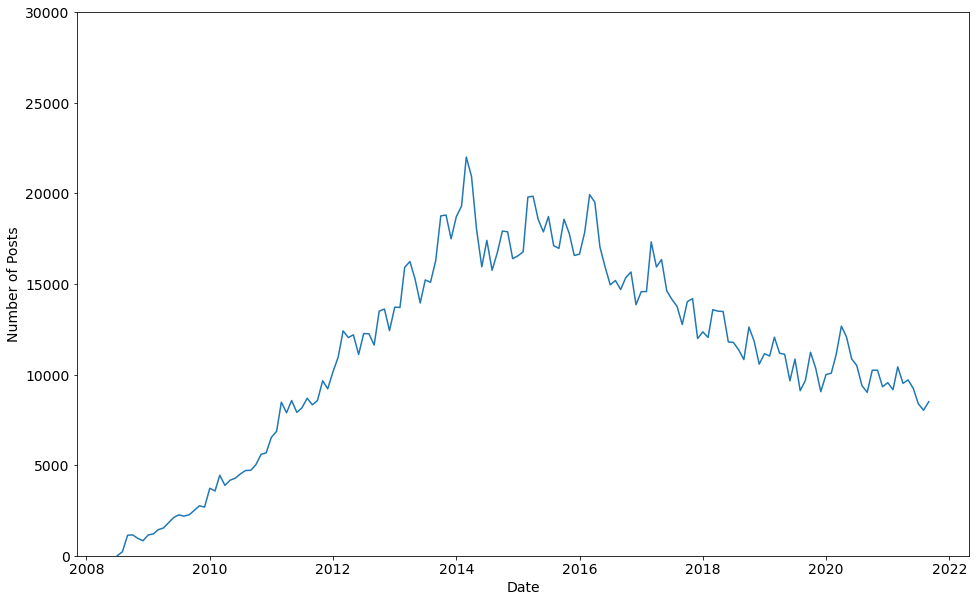

In [79]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

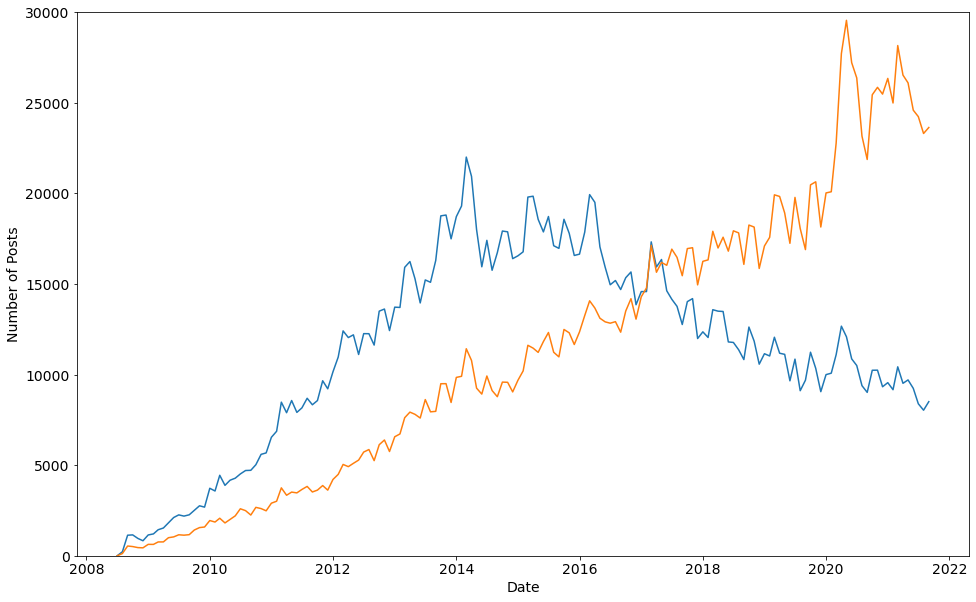

In [81]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

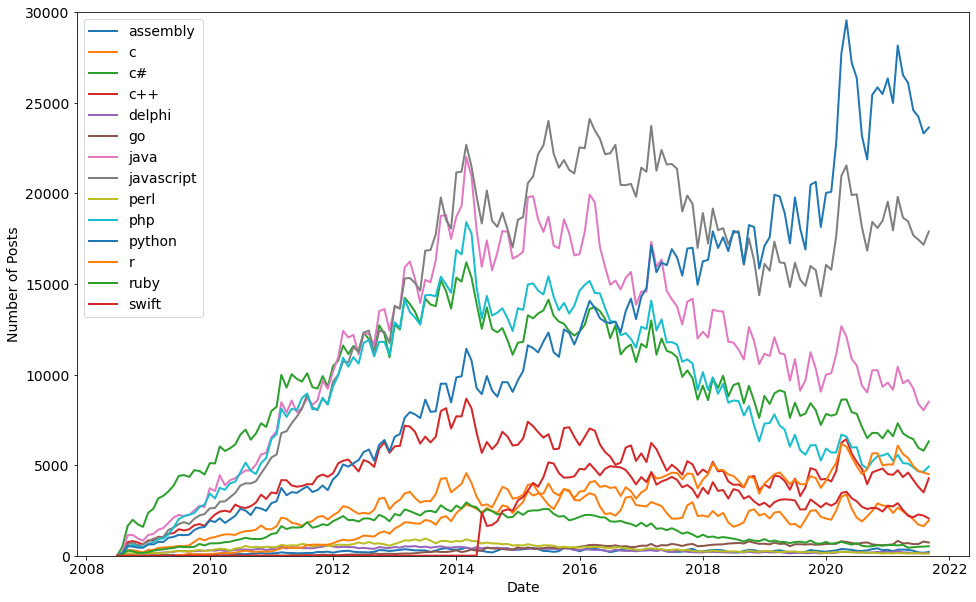

In [88]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=2, label=reshaped_df[column].name)
 
plt.legend(fontsize=14) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

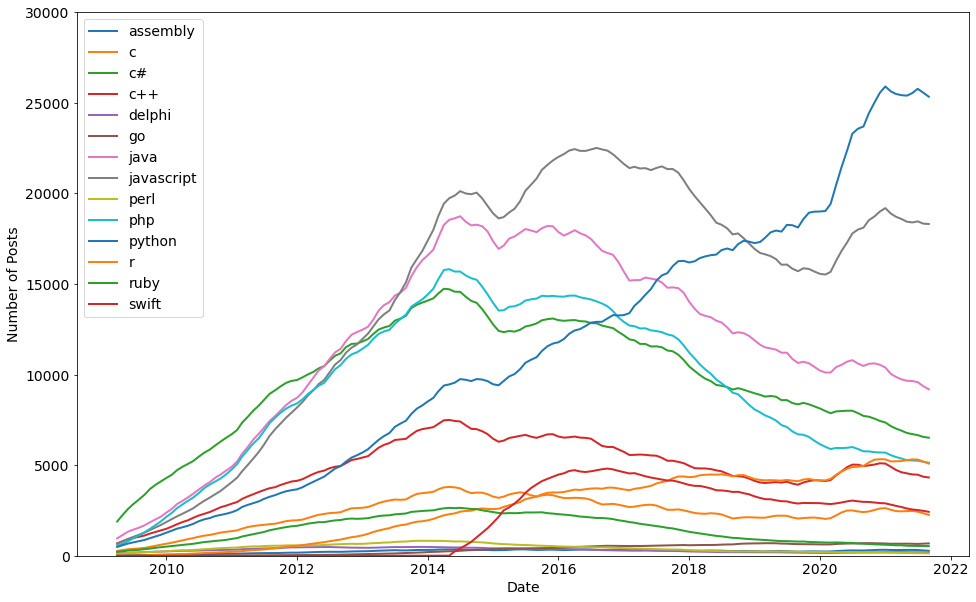

In [106]:
roll_df = reshaped_df.rolling(window=10).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=2, label=roll_df[column].name)
 
plt.legend(fontsize=14)


In [108]:
slice_df = reshaped_df.loc["2020-01-01":"2021-01-01"]
slice_df.sum()

TAG
assembly        4124.0
c              32862.0
c#             96951.0
c++            63918.0
delphi          2495.0
go              8777.0
java          135087.0
javascript    241336.0
perl            2314.0
php            74297.0
python        321907.0
r              67198.0
ruby            8245.0
swift          37547.0
dtype: float64